## Observations and Insights 

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

In [142]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [143]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [144]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [145]:
# Combine the data into a single dataset
combined_pymaceuticals_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="left")
# Display the data table for previe
combined_pymaceuticals_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [48]:
#Checking the number of mice.
combined_pymaceuticals_data["Mouse ID"].count() 

1893

In [146]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_MouseID = combined_pymaceuticals_data[combined_pymaceuticals_data.duplicated(["Mouse ID","Timepoint"])]
duplicated_MouseID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [147]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_MouseID = combined_pymaceuticals_data[combined_pymaceuticals_data.duplicated(["Mouse ID"])]
duplicated_MouseID.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
11,s185,Capomulin,Female,3,17,5,43.878496,0


In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouseID = combined_pymaceuticals_data.drop_duplicates("Mouse ID")
clean_mouseID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [151]:
# Checking the number of mice in the clean DataFrame.
clean_mouseID["Mouse ID"].count()


249

## Summary Statistics

In [149]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

group_lab_mean = combined_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
group_lab_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [150]:
group_lab_median = combined_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() 
group_lab_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [152]:
group_lab_variance = combined_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
group_lab_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [153]:
group_lab_standard_deviation = combined_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
group_lab_standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [154]:
group_lab_sem = combined_pymaceuticals_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
group_lab_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [155]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = pd.DataFrame({"Mean": group_lab_mean, "Median": group_lab_median, "Varians": group_lab_variance, "Standard Deviation": group_lab_standard_deviation, "SEM": group_lab_sem })
summary_statistics

,Mean,Median,Varians,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

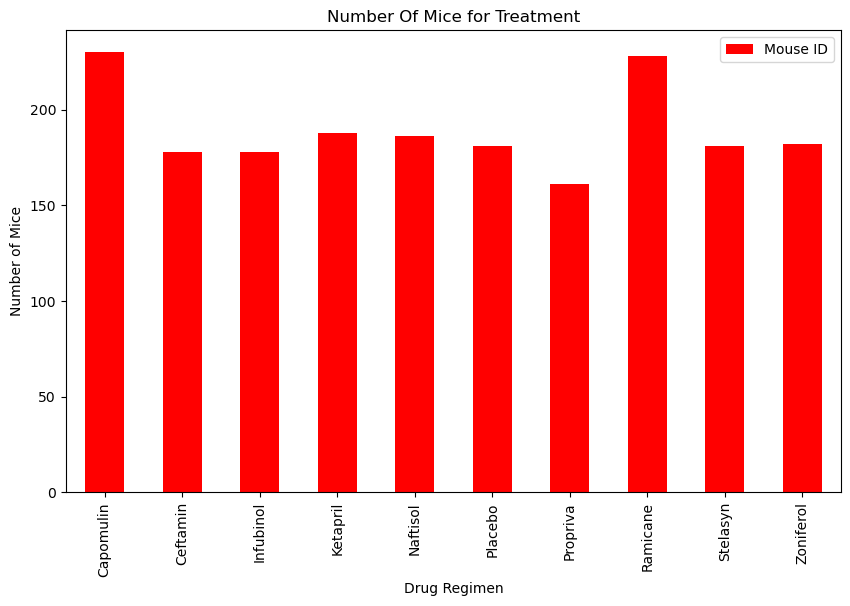

<Figure size 640x480 with 0 Axes>

In [156]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
group_treatment = pd.DataFrame(combined_pymaceuticals_data.groupby("Drug Regimen")["Mouse ID"].count())
group_treatment.plot(kind="bar", figsize=(10,6), color="red")
plt.title("Number Of Mice for Treatment")
plt.ylabel("Number of Mice")
plt.savefig("pymaceuticals Chart.png")
plt.show()
plt.tight_layout()

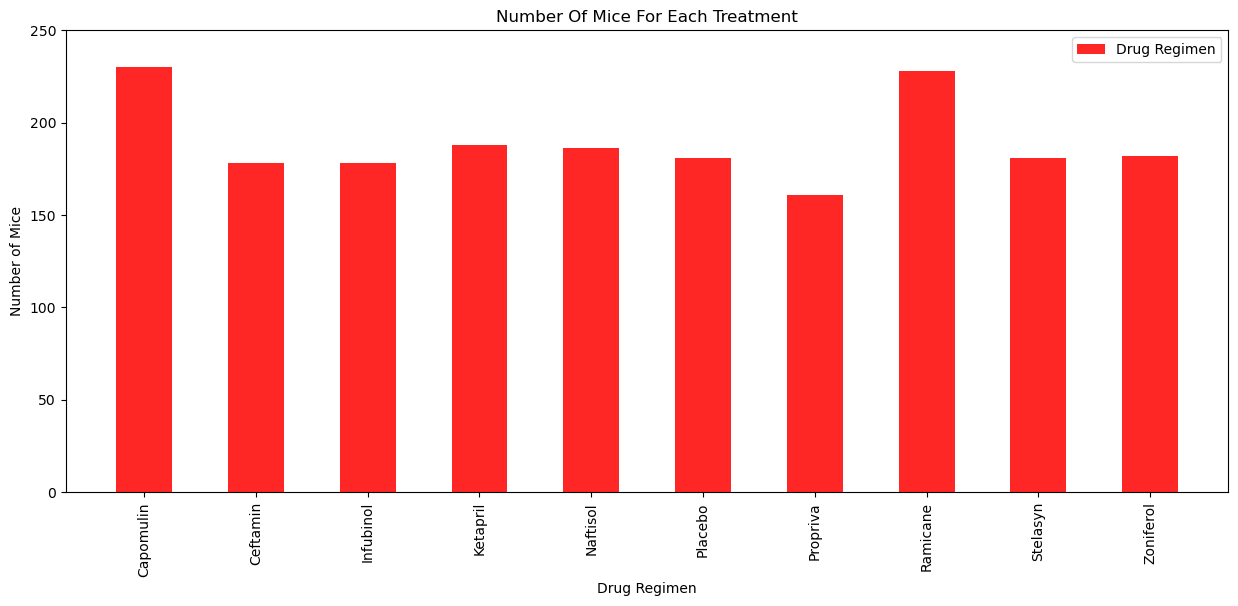

In [157]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
group_treatment = pd.DataFrame(combined_pymaceuticals_data.groupby("Drug Regimen")["Mouse ID"].count())
treatment_list = group_treatment.index.tolist()
mice_list = group_treatment["Mouse ID"].tolist()
x_axis = np.arange(len(mice_list))
plt.figure(figsize=(15,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,treatment_list, rotation='vertical')
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(mice_list)+20)
plt.title("Number Of Mice For Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.bar(x_axis, mice_list,width=0.5, color='red', alpha=0.85, align="center")
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.show()

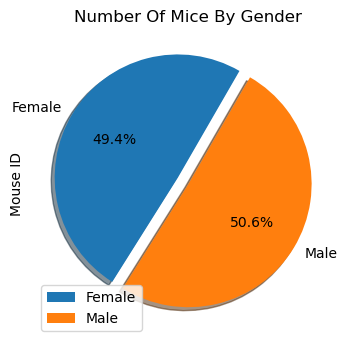

In [158]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
group_gender = pd.DataFrame(combined_pymaceuticals_data.groupby("Sex")["Mouse ID"].count())
group_gender.plot(kind="pie", explode=(0.1, 0), subplots=True, figsize=(8, 4), autopct="%1.1f%%", shadow=True, startangle=60)
plt.title("Number Of Mice By Gender")
plt.savefig("piechart.png")
plt.show()


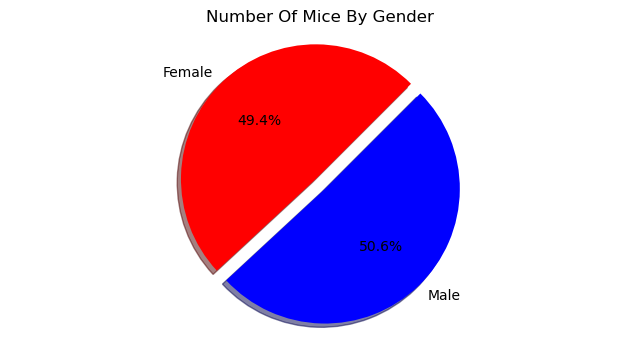

In [159]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
group_gender = pd.DataFrame(combined_pymaceuticals_data.groupby("Sex")["Mouse ID"].count())
sex = ["Female", "Male"]
total = [935, 958]
colors = ["red", "blue"]
explode = (0.1, 0)
plt.figure(figsize=(8, 4))
plt.pie(total, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45)
plt.title("Number Of Mice By Gender")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [160]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimen = combined_pymaceuticals_data[combined_pymaceuticals_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatment_regimen

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [161]:
# Start by getting the last (greatest) timepoint for each mouse
great_timepoint = pd.DataFrame(treatment_regimen.groupby("Mouse ID").max()["Timepoint"]) 
great_timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a275,45
a411,45
a444,45
...,...
y769,45
y793,45
y865,45


In [162]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(great_timepoint, treatment_regimen, on=("Mouse ID","Timepoint"),how="left")
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_regimen
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list  =  []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for x in drug_regimen:
    quartiles  =  merge_df.loc[merge_df["Drug Regimen"] == x,"Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerquantile = quartiles[0.25]
    upperquantile = quartiles[0.75]
    IQR  =  upperquantile-lowerquantile
    lower_bound  = lowerquantile - (1.5*IQR)
    upper_bound  = upperquantile + (1.5*IQR)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    print(x)
    print(f"The lower quartile of Tumor Volume is: {lowerquantile}")
    print(f"The upper quartile of Tumor Volume is: {upperquantile}")    
    print(f"The interquartile range of Tumor Volume is: {IQR}")
    print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n")
    
    # Determine outliers using upper and lower bounds
    

Capomulin
The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane
The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol
The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin
The lower quartile of Tumor Volume 

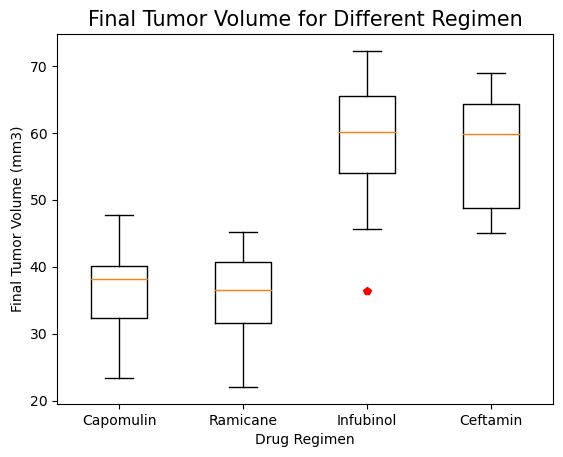

In [164]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for i in drug_regimen: 
        data_plotting = merge_df.loc[merge_df["Drug Regimen"] == i,"Tumor Volume (mm3)"]
        tumor_volume_list.append(data_plotting)
fig, ax = plt.subplots()

ax.boxplot(tumor_volume_list, sym = 'rp')
plt.xticks([1,2,3,4],drug_regimen)
ax.set_title('Final Tumor Volume for Different Regimen',fontsize=15)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)') 
plt.savefig("boxplot.png")
plt.show()
    


## Line and Scatter Plots

In [165]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_pymaceuticals_data.loc[combined_pymaceuticals_data["Drug Regimen"] == "Capomulin"]
capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [166]:
# choose one random mouse
sample_mouse = capomulin_df.loc[capomulin_df["Mouse ID"]== "s185"]
sample_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


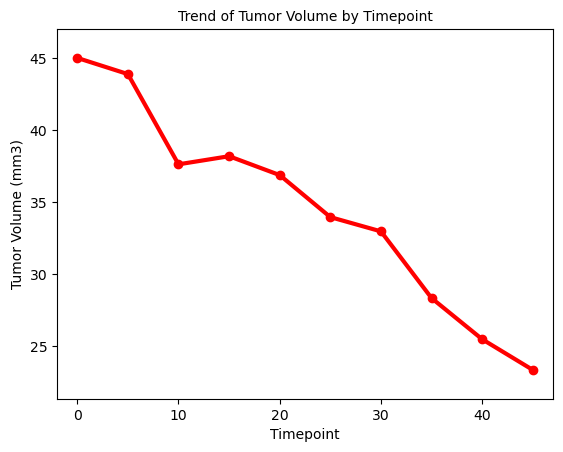

In [167]:
s185_mouse = plt. plot(sample_mouse["Timepoint"], sample_mouse["Tumor Volume (mm3)"], marker="o", color="red", linewidth=3.0)
plt.title('Trend of Tumor Volume by Timepoint',fontsize =10)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(min(sample_mouse["Timepoint"])-2, max(sample_mouse["Timepoint"])+2)
plt.ylim(min(sample_mouse['Tumor Volume (mm3)'])-2, max(sample_mouse['Tumor Volume (mm3)'])+2)
plt.show()

In [168]:
selected_capomulin = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
selected_capomulin

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [169]:
grouped_capomulin = pd.DataFrame(selected_capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
grouped_capomulin.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


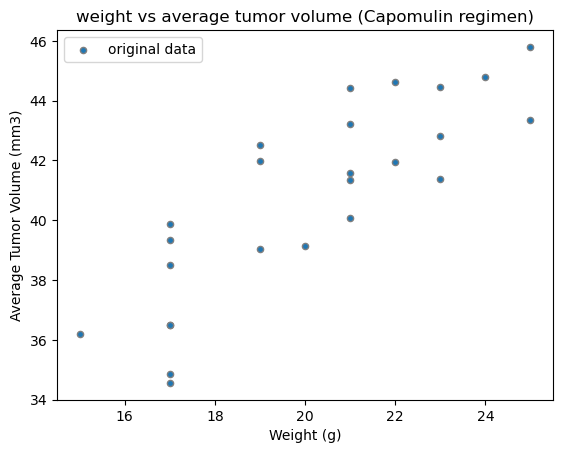

In [170]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_capomulin = grouped_capomulin.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
grouped_capomulin.head()

grouped_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", title="weight vs average tumor volume (Capomulin regimen)", label='original data', edgecolors = 'grey')
plt.savefig("scatterplot.png")
plt.show()

## Correlation and Regression

In [171]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight= grouped_capomulin.iloc[:,1]
average_tumor_volume= grouped_capomulin.iloc[:,2]

correlation = st.pearsonr(weight,average_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


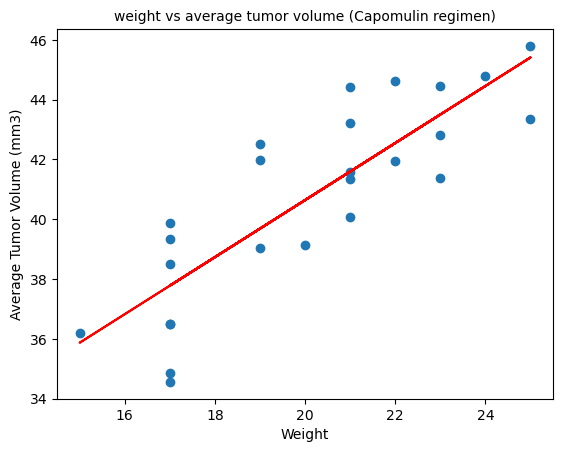

In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = grouped_capomulin['Weight (g)']
y_values = grouped_capomulin['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25), fontsize=13,color="red")
plt.title('weight vs average tumor volume (Capomulin regimen)',fontsize =10)
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("linear regression.png")
plt.show()